# Project 3 - Crossmatching astronomical catalogues

**Project deadline:** This project is due for submission on Wednesday, 01.07.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you *four* projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

Astronomical observations in optical wavelengths are performed nowadys with CCD-cameras mounted on optical telescopes. The following figure shows two observations of the same patch of the sky. The data were taken in 2007 at our old observatory [Hoher List](https://www.hoher-list.de/).

<img src="figs/dithered_images.png" width="700" height="700" />

The objects in black are stars. These sources can be extracted from the images and analysed for their appearance, their brightness and many other quantities. Please see the Notebook `scipy_optical_object_detection.ipynb` within the github-repository [Thomas Erben - Python Cheat Sheets](https://github.com/terben/Python-cheat-sheets) if you are interested how such analyses can be performed with Python. We already covered all necessary topics in our course!

You note that the two images show approximately the same patch of the sky but also that they are shifted with respect to each other. You can spot three prominent sources in the upper part of the left figure which are located closer to the center on the right.

Although we know *in principle* precisely what the shift between different astronomical exposures is (we ask the telescope to point to a certain position of the sky), this information is subject to errors and inaccuracies - mostly due to pointing problems of the telescope.

To compare properties of the same source in different exposures - for instance to investigate whether a star is variable, it is essential to determine *precise* shifts between such exposures. To implement an algorithm for this task is the topic of this project.

## Our Algorithm to crossmatch astronomical catalogs

Starting point for our project are the six object catalogs `image013269.asc .. image013274.asc` from consecutive observations of the same patch of the sky within the `data` subdirectory. The catalogs are text files having two columns: The $x$ and $y$ positions of detected sources in their respective CCD-images.

In [1]:
!head data/image013269.asc

44.5027 28.2661
191.230 215.587
150.108 259.954
204.017 290.501
608.995 296.005
561.983 322.495
731.254 373.325
436.115 361.365
87.2245 409.041
699.004 416.995


The following image shows detected sources in the images `image013269.asc` and `image013271.asc`.

<img src="figs/detected_objects.png" width="700" height="700" />

Can you spot that those catalogues originate from the same sky-area but are shifted against each other? 
Given those source lists, we want to implement an algorithm to automatically determine offsets between the exposures in $x-$ and $y$-directions.

**Notes:**
1. You might realise that an $x-$ and $y-$shift cannot be the whole story because astronomical observations are done on *a sphere* and not on a two-dimensional plane. This is correct and for large-format cameras, we need to take into account spherical geometry. However, in our case, the field-of-view is so small that we can neglect the effects of a sphere and the plane approximation is good enough.

2. We realise that objects present in one image might not be present in the other one. This can have several reasons: (1) edge effects; (2) a CCD might have bad pixels within an object; (3) some detections are CCD artefacts and not of astronomical origin.

A possible algorithm to estimate a linear shift between two-dimensional point clouds
that share the same pattern (object configuration) is the following:

1. We calculate the $x$- and $y$-distances from all objects in one catalogue
   with respect to *all objects* in the other catalogue:
   
   An example with two fake catalogues:
   - Catalogue 1 has objects at (1, 1), (3, 1), (3, 3), (1, 3), (2, 2), (7, 2), (-1, 2)
   - Catalogue 2 has objects at (4, 4), (6, 4), (6, 6), (4, 6), (5, 5), (1, 3), 10, 6)
   
    The common pattern in the catalogues is a $2\times 2$ square
    with a point in the middle and each catalogue contains two
    points not present in the counterpart.
    
    If we calculate the x distances for point 1 of catalogue 1
    with all objects from catalogue 2 we obtain the array:

    1 - 4, 1 - 6, 1 - 6, 1 - 4, 1 - 5, 1 - 1, 1 - 10
   
    We obtain for point 2:

    3 - 4, 3 - 6, 3 - 6, 3 - 4, 3 - 5, 3 - 1, 3 - 10
    
    The same we do for *all other* points and also for the
    $y$-distances. We store those $x-$ and $y-$distances in two arrays.
    
2.  We analyse the frequency of the distances in histograms.
    We realise that the offsets between the
    catalogues can be found in the histogram bins (for $x$ and $y$
    separately) that contain most counts.   

## Task 1

Please do all the tasks at the end of this notebook. You will finally hand-in the modified notebook to your tutor.

To test your understanding of the algorithm, please answer the following questions:

1. What are good and what are bad object patterns for this algorithm
   to work well. Why do you think that the algorithm is especially suited for astronomical data?
   
   **Hint:**
   Assume that your main pattern is a straight line of equidistant points. What problem    does occur in this case?
   
2.  I wrote above 'The offset between the catalogues can be found
    at the histogram bins (for $x-$ and $y-$ separately) that contain
    most counts.'. Why do we need a histogram analysis? Can't we just
    get all the distances as in point 1 of the algorithm and check which value (distance) occurs most often in the arrays?

3. Assume that we can estimate object positions with an accuracy of up to one CCD pixel. Which histogram bin size would you choose for your analysis and why?

## Task 2

Write a Python program to implement the algorithm above and to estimate the $x-$ and $y-$offsets between the object patterns in catalogues [data/image013269.asc](data/image013269.asc) and [data/image013271.asc](data/image013271.asc). Your program should plot the two histograms of the $x-$ and $y-$ distances and print the estimated offsets.

**Hints:**
1. First, read the data and store the $x-$ and $y-$ coordinates from each image in one-dimensional arrays. To obtain from those the arrays of all distances between the two catalogues is a *one-line* broadcast operation for each of the $x-$ and $y-$coordinates. You should have no difficulties with it if you understood the *Route 66*-problem from the lecture 06 review questions. If you have the distances written in a two-dimensional matrix, you can convert it to a one-dimensional array with the `np.flatten` command.

2. To analyse the histograms for the maximum-count bins and to estimate the distances, see the last task from the lecture 06 review questions. Up to what accuracy can you determine the shifts with this method?

3. For this and later tasks, I found the function `enumerate` very useful to write more compact programs. Just have a look at the documentation but do not feel obliged to use it.

## Task 3

We have six catalogues and we want to estimate shifts between *all* of them. Having the algorithm for pairwise shifts (Task 2), one could estimate shifts between three catalogues `c_1.asc`, `c_2.asc` and `c_3.asc` in the following two ways:
1. Obtain with Task 2 the distances between `c_1.asc` and `c_3.asc`. This be $d_{13}$. Similarily, the distance between `c_1.asc` and `c_2.asc` with Task 2 be $d_{12}$. Then the distance between `c_2.asc` and `c_3.asc` must be $d_{23} = d_{21} - d_{31}$.
2. Perform the same steps as in (1.) but estimate $d_{23}$ with Task 2 as well.

Perform this analysis for several combinations of the catalogues `image013269.asc .. image013274.asc`. What do you observe? If you obtain different results for $d_{23}$ with both methods, why is this the case?

## Task 4

Task 3 should show you that a pure pairwise analysis to obtain consistent offset values between more than two catalogues is not optimal. In this task, we want to estimate the shifts taking into account all available data points simultaneously.

We want to proceed as follows:

Using the algorithm of Task 2, we obtain estimates $d_{ij}$ for *all* pairs of distances between all involved catalogues. We write the $d_{ij}$ as follows:

$$
\begin{eqnarray}
  d_{12} & = d_{1} - d_{2} + e_{12}\\
  d_{13} & = d_{1} - d_{3} + e_{13}\\
  d_{14} & = d_{1} - d_{4} + e_{14}\\
  \vdots \\
  d_{23} & = d_{2} - d_{3} + e_{23}\\
  d_{24} & = d_{2} - d_{4} + e_{24}\\
  \vdots \\
  \label{eq:lsq} \tag{1}
\end{eqnarray}
$$

The $d_{i}$ are shifts that we would apply to image $i$ (separately for $x$ and $y$) and the $e_{ij}$ are (unknown) errors of the $d_{ij}s$.
The goal is to obtain $d_{i}s$ that satisfy *all* equations of (1) simultanesously *as good as possible*. 

### Subtask 4.1
Please make clear to yourself that estimating the $d_{i}s$ can be formulated as a classical *Linear Least Squares Problem*; see also the next subtask. You already solved many of those in your Lab experiments or/and you learned about it in your math courses. You have measurements $d_{ij}$ with (not exactly known) errors and many equations for the unknowns $d_{i}$.

To show you better that you already know this sort of problem: A classical physics experiment is to estimate velocoty and starting point of a car undergoing a uniform motion, i.e. to estimate parameters of the relation $s=v\cdot t + s_0$. You typically have many mesurements of $t$ and $s$ (with errors) and you estimate $v$ and $s_0$ with a *fit* (a Linear Least-Squares problem!). Our task at hand is very similar!

Please discuss, why the system (1) above cannot be solved uniquely in the *Least-Squares sense*. To be able to do so, you need to add another equation to the system. There are many possibilities to do so. Just write down why you make a certain choice.

If you have difficulties with this task at this stage, come back to it after the next subtask.

### Subtask 4.2
For clarity, we discuss the general case of the equation system $(1)$ above in the special case of three catalogues. In that case, the three equations:
$$
\begin{eqnarray*}
  d_{12} & = d_{1} - d_{2} + e_{12}\\
  d_{13} & = d_{1} - d_{3} + e_{13}\\
  d_{23} & = d_{2} - d_{3} + e_{23}\\
  \label{eq:three_cat} \tag{2}
\end{eqnarray*}
$$
can be written in matrix form $Ax - b = e$ with:
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
\end{pmatrix};
x=
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
\end{pmatrix};
\label{eq:matrix} \tag{3}
$$

The Least-Squares technique (or a data-fit) now chooses the $x$ (or the $d_{i}s$) which minimise the Euclidean norm of $e$:
$$
\text{min}\; ||e||_{2}^{2} = \text{min}\; ||Ax - b||_{2}^{2},
$$
where $||\cdot ||$ is the euclidean norm.

The solution to this problem is given by the *normal equations*:
$$
(A^T A) x = A^T b.
\label{eq:normal_eq} \tag{4}
$$

This is a system of *normal linear equations* which you know very well from Linear Algebra. 
Write down the matrix $A^T A$ for the case of eq. (2) and show that it is a singular matrix. This is the mathematical reason for the argument that you provided in subtask 4.1. Add your choice of an additional equation to the system of (2) and show that (4) now will give a unique solution to the problem.

### Subtask 4.3

Implement the algorithm of subtask 4.2 to solve the offset problem for the six catalogues `image013269.asc .. image013274.asc`. Start your code with a list containing the locations of the involved catalogues. Your program needs to handle the genral case when an arbitrary amount of catalogues ($\geq 2$) is put into that list, i.e. your program should not work only for the special case of six catalogues. Finally, plot in a scatter plot the offset pattern for the six observations.

**Hints:** (1) Note that you have to solve a system of equations (2) for each of the $x-$ and $y-$coordinates; (2) How many equations do you need if you have $n$ catalogues?; (3) You can use loops to obtain the $d_{ij}s$ and to build up matrix $A$ and vector $b$; (4) You do not need to plot all the histograms - you should do so in the beginning to test your program though. Have a look at the `numpy.histogram` function. It is equivalent to `plt.histogram` but it does not plot the histogram. (5) Have a look at the `numpy.linalg.lstsq` function. You can directly feed into that function the matrx $A$ and vector $b$ from eq. (3). There is no need for you to explicitely build and solve the normal equations from eq. (4).

## Task 1:
1. The method works well for irregular data patterns and doesn't work well for regular patterns such as a line with equi-distant points. In the case with regular patterns the histograms doesn't have an unique maximum, and therefore we can't determine the shift uniquely. It works well with astronomical data because star positions are random. 
2. because we need to account for errors in the measurements. In theory the most frequent number should be exactly the shift s, which will appear N times (N being the number of common stars in both graphs). But in practice we could have N numbers that are close to s but not exactly s. We can avoid this problem but using an appropriate bin size. 
3. Bin size should be four times the size of one CCD pixel d, because x and y coordinates are measure with an accuracy $x\pm d$ and $y\pm d$, therefore $x_i-x_i$ has an accuracy of $\pm2d$. Bin size should be chosen as small as possible to avoid introducing more errors. In our case $d=1$.

## Task 2

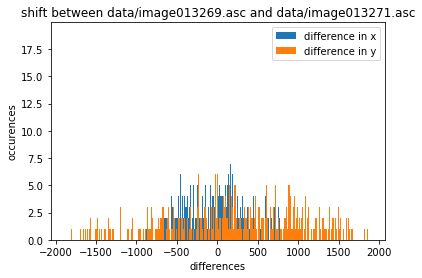

The offset in x is -27.712530000000015, the offset in y is -576.1186035600425


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define a function that produces pairwise shifts as well as two histograms
def shift(c1,c2):
    
    #open the first file and read the data into a 2-d array
    file1 = open(c1,'r')
    data1 = np.genfromtxt(file1, delimiter=' ')
    
    #store the x and y coordinates in two 1-d arrays respectively
    x1=data1[:,0]
    y1=data1[:,1]

    #open the second file and read the data into a 2-d array
    file2=open(c2,'r')
    data2 = np.genfromtxt(file2, delimiter=' ')
    
    #store the x and y coordinates in two 1-d arrays respectively
    x2=data2[:,0]
    y2=data2[:,1]

    #calculate the difference in x and y for all pairs of points between the first and second graph
    x_diff=(x2-x1[:,np.newaxis]).flatten()
    y_diff=(y2-y1[:,np.newaxis]).flatten()

    #calculate the number of bins for x and y by requiring that bin size equals 4
    x_bins=np.int((x_diff.max()-x_diff.min())//4)
    y_bins=np.int((y_diff.max()-y_diff.min())//4)

    #create a figure and plot the histogram
    plt.figure()
    values,bins,_=plt.hist(x_diff,bins=x_bins,label='difference in x')

    #find the index of the maximal value
    max_ind = np.argmax(values)
    
    #find the middle point of the bin with the maximal value
    x_shift = 0.5 * (bins[max_ind] + bins[max_ind + 1])

    #plot the histogram for y in the same graph
    values,bins,_=plt.hist(y_diff,bins=y_bins,label='difference in y')

    #find the index of the maximal value
    max_ind = np.argmax(values)
    
    #find the middle point of the bin with the maximal value
    y_shift = 0.5 * (bins[max_ind] + bins[max_ind + 1])
    
    #plot legend and title
    plt.legend()
    plt.title('shift between {} and {}'.format(c1,c2))
    
    #plot x and y labels
    plt.xlabel('differences')
    plt.ylabel('occurences')
    
    plt.show()
    
    #return the estimated offset in x and y
    return x_shift,y_shift

x_shift,y_shift=shift('data/image013269.asc','data/image013271.asc')
print('The offset in x is {}, the offset in y is {}'.format(x_shift,y_shift))

## Task 3

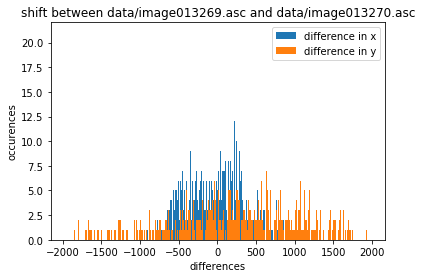

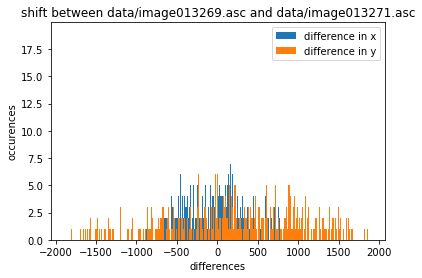

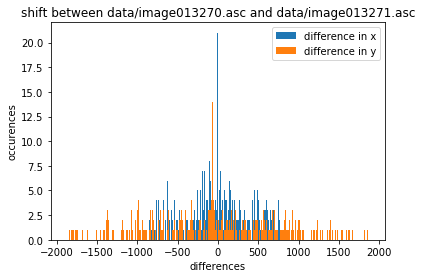

(-5.544307000000117, -66.899559256889) (-5.538756986899671, -65.07696843220356)


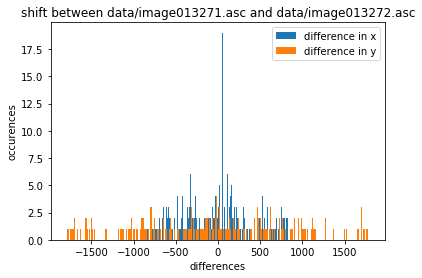

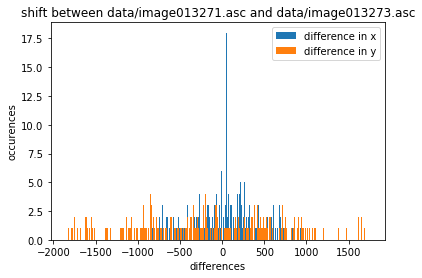

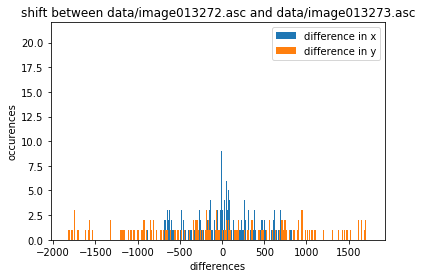

(-4.9297745161291004, -48.522099999999796) (-2.9351494541484158, -48.52210000000014)


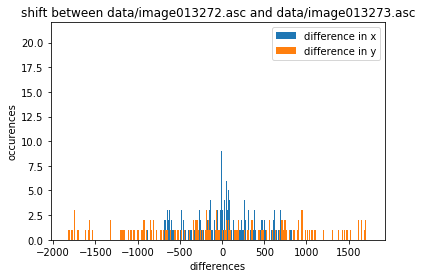

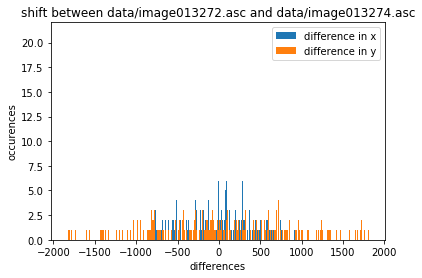

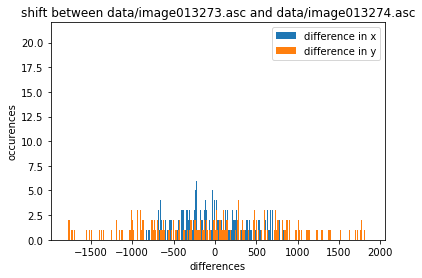

(-64.77041127546516, 1.0342399347119908) (-62.77599817596564, -0.9445909782608624)


In [3]:
#calculate the shift between the first and second graph
d12=shift('data/image013269.asc','data/image013270.asc')

#calculate the shift between the first and third graph
d13=shift('data/image013269.asc','data/image013271.asc')

#calculate the shift between the second and third graph by triangularition
d23_theory=(d13[0]-d12[0],d13[1]-d12[1])

#calculate the shift between the second and third graph
d23=shift('data/image013270.asc','data/image013271.asc')

#print comparison
print(d23_theory,d23)

#the same for the third, fourth and fifth graph
d34=shift('data/image013271.asc','data/image013272.asc')
d35=shift('data/image013271.asc','data/image013273.asc')
d45_theory=(d35[0]-d34[0],d35[1]-d34[1])
d45=shift('data/image013272.asc','data/image013273.asc')

print(d45_theory,d45)

#the same for the fourth, fifth and sixth graph
d45=shift('data/image013272.asc','data/image013273.asc')
d46=shift('data/image013272.asc','data/image013274.asc')
d56_theory=(d46[0]-d45[0],d46[1]-d45[1])
d56=shift('data/image013273.asc','data/image013274.asc')

print(d56_theory,d56)

$d_{23}$ is not the same as $d_{13}-d_{12}$. The reason could be, that the errors accumulate in transmission through c1.asc. 

## Task 4
## Subtask 4.1
Because all graphs can undergo a common shift while all relative shifts are unchanged, we need to fix one graph. For example we set the sum of all shifts to $0$, or $\sum d_i=0$.

## Subtask 4.2
$$
A^TA=
\begin{pmatrix}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 \\
\end{pmatrix}
$$
$A$ is singular because $\det(A^TA)=0$. Thus the solution $x$ will have a special part and a homogeneous part. We add 
$$
0=d_1+d_2+d_3+e
$$
as an additional requirement to eliminate the unwanted freedom in the homogeneous solution. This means $A$ has one additional line 
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
1 & 1 & 1 \\
\end{pmatrix}
$$
and
$$
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
0 \\
\end{pmatrix}
$$

## Subtask 4.3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:101: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:102: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


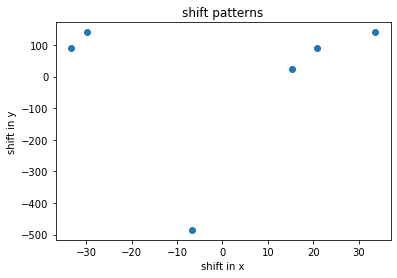

In [4]:
#define a function that produces the shift between two graphs but doesn't produce histograms
def shift_no_graph(c1,c2):
    
    #open graph 1 and store the data in a 2-d array
    file1 = open(c1,'r')
    data1 = np.genfromtxt(file1, delimiter=' ')
    
    #store x and y coordinates in two 1-d arrays
    x1=data1[:,0]
    y1=data1[:,1]

    #open graph 2 and store the data in a 2-d array
    file2=open(c2,'r')
    data2 = np.genfromtxt(file2, delimiter=' ')
    
    #store x and y coordinates in two 1-d arrays
    x2=data2[:,0]
    y2=data2[:,1]

    #difference in x and y for all possible pairs of points between the two graphs
    x_diff=(x2-x1[:,np.newaxis]).flatten()
    y_diff=(y2-y1[:,np.newaxis]).flatten()

    #calculate the number of bins for x and y shifts by requiring a bin size of 4
    x_bins=np.int((x_diff.max()-x_diff.min())//4)
    y_bins=np.int((y_diff.max()-y_diff.min())//4)

    #get the values and bins without drawing a histogram
    values,bins=np.histogram(x_diff,bins=x_bins)

    #get the index of maximal value
    max_ind = np.argmax(values)
    
    #calculate the middle point of the bin with maximal value as the estimated offset
    x_shift = 0.5 * (bins[max_ind] + bins[max_ind + 1])

    #get the values and bins without drawing a histogram
    values,bins=np.histogram(y_diff,bins=y_bins)

    #get the index of maximal value
    max_ind = np.argmax(values)
    
    #get the values and bins without drawing a histogram
    y_shift = 0.5 * (bins[max_ind] + bins[max_ind + 1])
    
    #return the shift in x and y
    return x_shift,y_shift

#define a function that takes a list of graphs and gives all the shifts simultaneously 
def shift_simultaneous(l):
    
    #number of graphs
    N=len(l)
    
    #with N graphs, there are N*(N-1)/2 possible pairs, which is equal to the number of equations we need
    #we add 1 more equation to fix the overall shift to 0
    #create a matrix A with the right size with all elements equal to 0
    A=np.zeros(shape=(np.int(1+N*(N-1)/2),N))
    
    #create two zero arrays with the right size to store shift between all possible pairs
    b_x=np.zeros(np.int(1+N*(N-1)/2))
    b_y=np.zeros(np.int(1+N*(N-1)/2))
    
    #k counts the row index to order to build matrix A and the vector b
    k=0
    
    #loop through all graphs except the last one
    for i in range(N-1):
        
        #loop through all graphs after the current one
        for j in range(i+1,N):
            
            #set right values for A in the curent row
            A[k,i]=1
            A[k,j]=-1
            
            #calculate the x and y shifts
            x,y=shift_no_graph(l[i],l[j])
            
            #build up the two b vectors
            b_x[k]=x
            b_y[k]=y
            
            #increase row index by 1
            k=k+1
            
    #set the last row of the matrix A to 1
    A[-1,:]=1
    
    #set the last element of the two b vectors to 0
    b_x[-1]=0
    b_y[-1]=0
    
    #return the matrix A and the two b vectors
    return A,b_x,b_y

#call the function for the six graphs we have
A,b_x,b_y=shift_simultaneous(['data/image013269.asc','data/image013270.asc','data/image013271.asc','data/image013272.asc','data/image013273.asc','data/image013274.asc'])            

#use least square method to get x and y shifts
x_shift,x_error,_,_=np.linalg.lstsq(A,b_x)
y_shift,y_error,_,_=np.linalg.lstsq(A,b_y)  

#scatter plot the shift one needs to apply to each graph
plt.scatter(x_shift,y_shift)

#set title
plt.title('shift patterns')

#set x and y label
plt.xlabel('shift in x')
plt.ylabel('shift in y')

#show plot
plt.show()